# Data Cleaning

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Load Datasets

In [27]:
#Source file: https://www.kaggle.com/usdot/flight-delays#flights.csv

#Main dataset
df_delayed_flights = pd.read_csv('../data/flights.csv', low_memory=False)

#Complementary datasets
df_airports = pd.read_csv('../data/airports.csv', low_memory=False)
df_airlines = pd.read_csv('../data/airlines.csv', low_memory=False)

# 2. Summarize the data

In [4]:
print('------- Main Dataset, Flights -------')
print(df_delayed_flights.shape)
print(df_delayed_flights.columns)
print(df_delayed_flights.head())
print(df_delayed_flights.describe())

print('\n ------- Airports -------')
print(df_airports.shape)
print(df_airports.columns)
print(df_airports.head())
print(df_airports.describe())

print('\n ------- Airlines -------')
print(df_airlines.shape)
print(df_airlines.columns)
print(df_airlines.head())
print(df_airlines.describe())

------- Main Dataset, Flights -------
(5819079, 31)
Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1       

# 3. Data Cleaning

## 3.1. Merge Columns - DATE

In [28]:
df_delayed_flights['DATE'] = pd.to_datetime(df_delayed_flights[['YEAR','MONTH', 'DAY']])
print(df_delayed_flights.columns)

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE'],
      dtype='object')


## 3.2. Remove not relevant and duplicated columns

In [29]:
df_delayed_flights = df_delayed_flights.drop(['YEAR','DAY','DAY_OF_WEEK'], axis=1)
df_delayed_flights = df_delayed_flights.drop(['TAXI_OUT','TAXI_IN','WHEELS_OFF', 'WHEELS_ON','AIR_TIME','ELAPSED_TIME'], axis=1)
print(df_delayed_flights.columns)

df_airports = df_airports[['IATA_CODE','AIRPORT']]
print(df_airports.columns)


Index(['MONTH', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE'],
      dtype='object')
Index(['IATA_CODE', 'AIRPORT'], dtype='object')


## 3.3. Rename Columns

In [30]:
df_airports.columns = ['AIRPORT_CODE','AIRPORT_NAME']
df_airlines.columns = ['AIRLINE_CODE','AIRLINE_NAME']

## 3.4. Change type

In [31]:
# Function to convert from 'HHMM' string to datetime.time
# Reference: https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial

import datetime

def format_time(time_string):
    
    if isinstance(time_string, datetime.time):
        return time_string
    
    if pd.isnull(time_string):
        return np.nan
    
    else:
        if time_string == 2400: #12 midnight
            time_string = 0
            
        time_string = "{0:04d}".format(int(time_string)) #Format the string to be as 4 decimals (hh:mm)
        formated_time = datetime.time(int(time_string[0:2]), int(time_string[2:4])) #Split the 4 digits into 2 parts
        return formated_time

In [32]:
# Call the Function:

df_delayed_flights['SCHEDULED_DEPARTURE'] = df_delayed_flights['SCHEDULED_DEPARTURE'].apply(format_time)
df_delayed_flights['DEPARTURE_TIME'] = df_delayed_flights['DEPARTURE_TIME'].apply(format_time)
df_delayed_flights['SCHEDULED_ARRIVAL'] =df_delayed_flights['SCHEDULED_ARRIVAL'].apply(format_time)
df_delayed_flights['ARRIVAL_TIME'] = df_delayed_flights['ARRIVAL_TIME'].apply(format_time)

#Print a sample..
df_delayed_flights.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
                            'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,00:05:00,04:30:00,23:54:00,04:08:00,-11.00,-22.00
1,00:10:00,07:50:00,00:02:00,07:41:00,-8.00,-9.00
2,00:20:00,08:06:00,00:18:00,08:11:00,-2.00,5.00
3,00:20:00,08:05:00,00:15:00,07:56:00,-5.00,-9.00
4,00:25:00,03:20:00,00:24:00,02:59:00,-1.00,-21.00
5,00:25:00,06:02:00,00:20:00,06:10:00,-5.00,8.00


## 3.5. Change Values

In [33]:
#Replace cancallation reason with meaningful values
df_delayed_flights["CANCELLATION_REASON"].replace({'A':'Airline',
                                                   'B':'Weather',
                                                   'C':'National Air System',
                                                   'D':'Security'}, inplace=True)

df_delayed_flights["CANCELLATION_REASON"].value_counts()

Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64

## 3.6. Missing values

In [34]:
print("Delayed Flights Missing Values:\n", df_delayed_flights.isnull().sum())
print("Airlines Missing Values:\n", df_airlines.isnull().sum())
print("Airports Missing Values:\n", df_airports.isnull().sum())

Delayed Flights Missing Values:
 MONTH                        0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
DATE                         0
dtype: int64
Airlines Missing Values:
 AIRLINE_CODE    0
AIRLINE_NAME    0
dtype: int64
Airports Missing Values:
 AIRPORT_CODE    0
AIRPORT_NAME    0
dtype: int64


### a. CANCELLATION_REASON

In [35]:
print("Total number of delayed flights: ", len(df_delayed_flights))
print("Cancelled flights= ", sum(df_delayed_flights['CANCELLED']))
print(df_delayed_flights['CANCELLATION_REASON'].value_counts())

Total number of delayed flights:  5819079
Cancelled flights=  89884
Weather                48851
Airline                25262
National Air System    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64


#### Conclusion: Number of missing data under the variable "CANCELLATION_REASON" is large since when the flight was not cancelled, no reason code was assigned. We can replace no values with  "Not Cancelled":

In [36]:
df_delayed_flights['CANCELLATION_REASON'] = df_delayed_flights['CANCELLATION_REASON'].fillna('Not_Cancelled')
df_delayed_flights['CANCELLATION_REASON'].isnull().sum()
print(df_delayed_flights['CANCELLATION_REASON'].value_counts())

Not_Cancelled          5729195
Weather                  48851
Airline                  25262
National Air System      15749
Security                    22
Name: CANCELLATION_REASON, dtype: int64


### b. DEPARTURE_DELAY & ARRIVAL_DELAY

In [37]:
df_delayed_flights[(df_delayed_flights['DEPARTURE_DELAY'].isnull()) &
                   (df_delayed_flights['ARRIVAL_DELAY'].isnull())].index

Int64Index([     32,      42,      68,      82,      90,     128,     131,
                147,     166,     206,
            ...
            5813861, 5814553, 5816650, 5816994, 5817980, 5818090, 5818157,
            5818318, 5818777, 5818843],
           dtype='int64', length=86153)

#### Conclosion: Flights with no departure delay, doesn't have arrival delay too. (same flights in both columns)

In [20]:

airlines_dep_delays = df_delayed_flights.groupby('AIRLINE', sort=False)['DEPARTURE_DELAY'].mean()
airlines_arr_delays = df_delayed_flights.groupby('AIRLINE', sort=False)['ARRIVAL_DELAY'].mean()

print(airlines_dep_delays.sort_values())
print(airlines_arr_delays.sort_values())

AIRLINE
HA    0.49
AS    1.79
US    6.14
DL    7.37
OO    7.80
EV    8.72
AA    8.90
VX    9.02
MQ   10.13
WN   10.58
B6   11.51
F9   13.35
UA   14.44
NK   15.94
Name: DEPARTURE_DELAY, dtype: float64
AIRLINE
AS   -0.98
DL    0.19
HA    2.02
AA    3.45
US    3.71
WN    4.37
VX    4.74
UA    5.43
OO    5.85
MQ    6.46
EV    6.59
B6    6.68
F9   12.50
NK   14.47
Name: ARRIVAL_DELAY, dtype: float64


In [21]:
# Fill missing values with mean delay for each airline.

for idx in df_delayed_flights.index[df_delayed_flights['DEPARTURE_DELAY'].isnull()]:    
    
    if(df_delayed_flights.loc[idx,'CANCELLED'] == 1):
        
    
    
    else:
    airline_code = df_delayed_flights.loc[idx,'AIRLINE']
    df_delayed_flights.at[idx,'DEPARTURE_DELAY'] = airlines_dep_delays.at[airline_code]
    df_delayed_flights.at[idx,'DEPARTURE_DELAY'] = airlines_arr_delays.at[airline_code]

In [38]:
# Remove flights with missing delays
missing = []
missing += list(df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'].isnull()].index)

len(missing)

86153

In [41]:
df_delayed_flights = df_delayed_flights[~df_delayed_flights.index.isin(missing)]
print(len(df_delayed_flights))

5732926


# 4. Remove Outliers

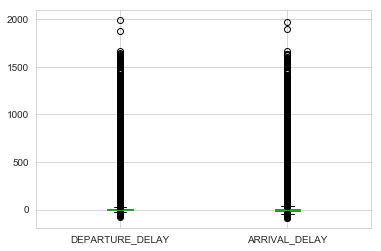

In [42]:
df_delayed_flights[["DEPARTURE_DELAY","ARRIVAL_DELAY"]].plot.box()
plt.show()

C:\Users\A-Sha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\A-Sha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


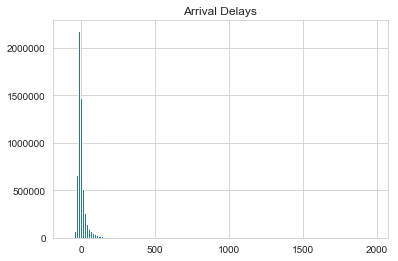

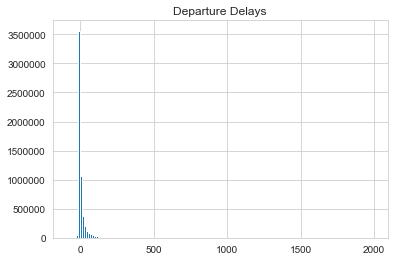

In [43]:
plt.hist(df_delayed_flights['ARRIVAL_DELAY'], bins=150)
plt.title("Arrival Delays")
plt.show()

plt.hist(df_delayed_flights['DEPARTURE_DELAY'], bins=150)
plt.title("Departure Delays")
plt.show()

In [44]:
#Determine Outliers

mean_arrival_delays = np.mean(df_delayed_flights['ARRIVAL_DELAY'] )
sd_arrival_delays = np.std(df_delayed_flights['ARRIVAL_DELAY'])

mean_departure_delays = np.mean(df_delayed_flights['DEPARTURE_DELAY'])
sd_departure_delays = np.std(df_delayed_flights['DEPARTURE_DELAY'])

print('Arrival Delays:\t \t Mean = {0} \t SD = {1}'.format(mean_arrival_delays, sd_arrival_delays))
print('Departure Delays:\t Mean = {0} \t SD = {1}'.format(mean_departure_delays, sd_departure_delays))


Arrival Delays:	 	 Mean = 4.407057357987598 	 SD = 39.27129365752419
Departure Delays:	 Mean = 9.370158275198389 	 SD = 37.080939262729146


In [45]:
#Arrrival_delay or Departure_delay != 0 

arrival_delays = df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] != 0.00]['ARRIVAL_DELAY']
departure_delays = df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] != 0.00]['DEPARTURE_DELAY']

print(arrival_delays.shape)


mean_ad = np.mean(arrival_delays)
sd_ad = np.std(arrival_delays)

mean_dd = np.mean(departure_delays)
sd_dd = np.std(departure_delays)

print("With removing on-time flights:")

print('Arrival Delays:\t \t Mean = {0} \t SD = {1}'.format(mean_ad, sd_ad))
print('Departure Delays:\t Mean = {0} \t SD = {1}'.format(mean_dd, sd_dd))


(5606713,)
With removing on-time flights:
Arrival Delays:	 	 Mean = 4.5066007253308324 	 SD = 39.70668408480284
Departure Delays:	 Mean = 9.941291362037587 	 SD = 38.11990930423063


In [46]:
# Removing
flights_to_remove = []

# remove based on arrival and departure delays (normal distribution)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] > mean_ad + 3.0* sd_ad].index)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['ARRIVAL_DELAY'] < mean_ad - 3.0* sd_ad].index)

flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] > mean_dd + 3.0* sd_dd].index)
flights_to_remove = flights_to_remove + list(df_delayed_flights[df_delayed_flights['DEPARTURE_DELAY'] < mean_dd - 3.0* sd_dd].index)

print('')
print('# Flights to remove', len(flights_to_remove))



# Flights to remove 218364


In [47]:

new_delayed_flights = df_delayed_flights[~df_delayed_flights.index.isin(flights_to_remove)]
print("Was: ", df_delayed_flights.shape, " Now: ", new_delayed_flights.shape)


Was:  (5732926, 25)  Now:  (5611364, 25)


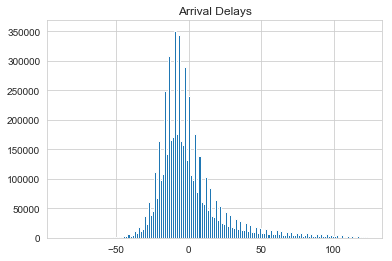

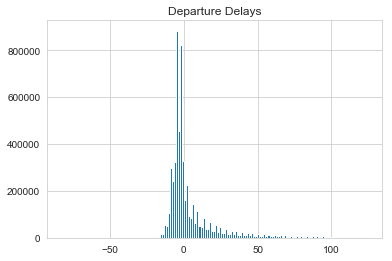

In [48]:

plt.hist(new_delayed_flights['ARRIVAL_DELAY'], bins=150)
plt.title("Arrival Delays")
plt.show()

plt.hist(new_delayed_flights['DEPARTURE_DELAY'], bins=150)
plt.title("Departure Delays")
plt.show()

## 5. Merging datasets

In [52]:
df_merge_v1 = new_delayed_flights.copy()

#Merge Airlines and Flights dfs
df_merge_v1 = pd.merge(new_delayed_flights, df_airlines, left_on='AIRLINE', right_on='AIRLINE_CODE', how='left')

#Merge Airports and Flights dfs on Origin_Airport and Airport_Code
df_merge_v1 = pd.merge(df_merge_v1, df_airports, left_on='ORIGIN_AIRPORT', right_on='AIRPORT_CODE', how='left')
df_merge_v1.rename(columns={'ORIGIN_AIRPORT':'ORIGIN_AC', #Origin Airport Code
                            'AIRPORT_NAME':'ORIGIN_AIRPORT', #Origin Airport Name
                            'DESTINATION_AIRPORT': 'DESTINATION_AC'}, inplace=True) #Dest Airport Code
df_merge_v1.drop(['AIRLINE','AIRPORT_CODE'], axis=1, inplace=True)

#Merge Airports and Flights dfs on Destination_Airport and Airport_Code
df_merge_v1 = pd.merge(df_merge_v1, df_airports, left_on='DESTINATION_AC', right_on='AIRPORT_CODE', how='left')
df_merge_v1.rename(columns={'AIRPORT_NAME':'DESTINATION_AIRPORT'}, inplace=True) #Dest Airport Name

df_merge_v1.drop('AIRPORT_CODE', axis=1, inplace=True)

In [53]:
print("Merged Dataframe Columns: \n", df_merge_v1.columns)

df_merge_v1[['ORIGIN_AIRPORT', 'ORIGIN_AC','DESTINATION_AIRPORT', 'DESTINATION_AC']]

Merged Dataframe Columns: 
 Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AC', 'DESTINATION_AC',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
      dtype='object')


,ORIGIN_AIRPORT,ORIGIN_AC,DESTINATION_AIRPORT,DESTINATION_AC
0,Ted Stevens Anchorage International Airport,ANC,Seattle-Tacoma International Airport,SEA
1,Los Angeles International Airport,LAX,Palm Beach International Airport,PBI
2,San Francisco International Airport,SFO,Charlotte Douglas International Airport,CLT
3,Los Angeles International Airport,LAX,Miami International Airport,MIA
4,Seattle-Tacoma International Airport,SEA,Ted Stevens Anchorage International Airport,ANC
5,San Francisco International Airport,SFO,Minneapolis-Saint Paul International Airport,MSP
6,McCarran International Airport,LAS,Minneapolis-Saint Paul International Airport,MSP
7,Los Angeles International Airport,LAX,Charlotte Douglas International Airport,CLT
8,San Francisco International Airport,SFO,Dallas/Fort Worth International Airport,DFW
9,McCarran International Airport,LAS,Hartsfield-Jackson Atlanta International Airport,ATL


## Save file

In [ ]:
df_merge_v1.to_csv('../data/flightsmerged.csv', index=False)